In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [1]:
import yfinance as yf
from datetime import datetime
from __future__ import division


In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end= datetime.now()

start= datetime(end.year-2,end.month,end.day) 

In [8]:
stock_data = {}

for stock in tech_list:
    try:
        print(f"Fetching data for {stock}...")
        data = yf.download(stock, start=start, end=end)
        stock_data[stock] = data
        print(f"Success for {stock}")
    except Exception as e:
        print(f"Error fetching {stock}: {e}")



Fetching data for AAPL...


[*********************100%***********************]  1 of 1 completed


Success for AAPL
Fetching data for GOOG...


[*********************100%***********************]  1 of 1 completed


Success for GOOG
Fetching data for MSFT...


[*********************100%***********************]  1 of 1 completed


Success for MSFT
Fetching data for AMZN...


[*********************100%***********************]  1 of 1 completed

Success for AMZN


In [12]:
stock_data['GOOG'].tail()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2025-04-07,149.240005,154.929993,142.660004,143.389999,47823000
2025-04-08,146.580002,154.440002,145.210007,153.574997,35304400
2025-04-09,161.059998,161.869995,145.809998,146.330002,46479500
2025-04-10,155.369995,160.029999,152.199997,158.759995,35270500
2025-04-11,159.399994,159.860001,155.585007,155.585007,22569400


In [13]:
stock_data['AAPL'].describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,503.000000,503.000000,503.000000,503.000000,5.030000e+02
mean,199.744971,201.503436,197.743717,199.488158,5.723269e+07
std,25.791646,26.056550,25.370020,25.750550,2.638478e+07
min,158.501572,160.441995,158.184759,159.610385,2.323470e+07
25%,177.365051,178.568316,175.445452,176.903114,4.359675e+07
50%,190.649246,192.345171,189.273875,190.347162,5.124530e+07
75%,224.241402,226.321889,222.508767,224.369714,6.240215e+07
max,258.735504,259.814335,257.347047,257.906429,3.186799e+08


In [14]:
stock_data['AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2023-04-12 to 2025-04-11
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   503 non-null    float64
 1   (High, AAPL)    503 non-null    float64
 2   (Low, AAPL)     503 non-null    float64
 3   (Open, AAPL)    503 non-null    float64
 4   (Volume, AAPL)  503 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.6 KB


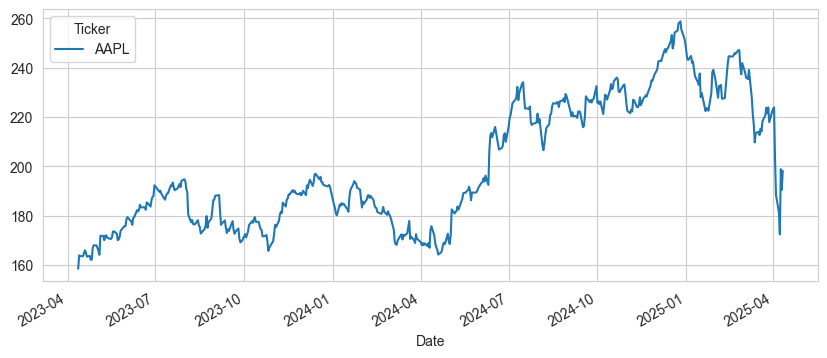

In [32]:
stock_data['AAPL']['Close'].plot(legend=True,figsize=(10,4))
plt.show()

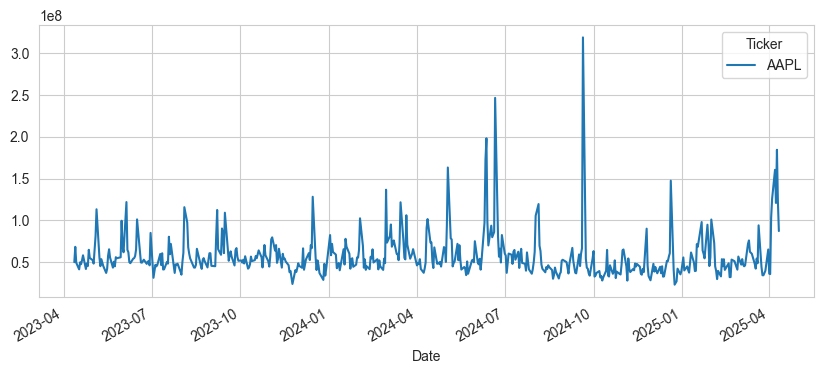

In [31]:
stock_data['AAPL']['Volume'].plot(legend=True,figsize=(10,4))
plt.show()

In [19]:
ma_day =[10,20,50]

for ma in ma_day:
    column_name=f'MA for {ma} days'

    stock_data['AAPL'][column_name] = stock_data['AAPL']['Close'].rolling(window=ma).mean()

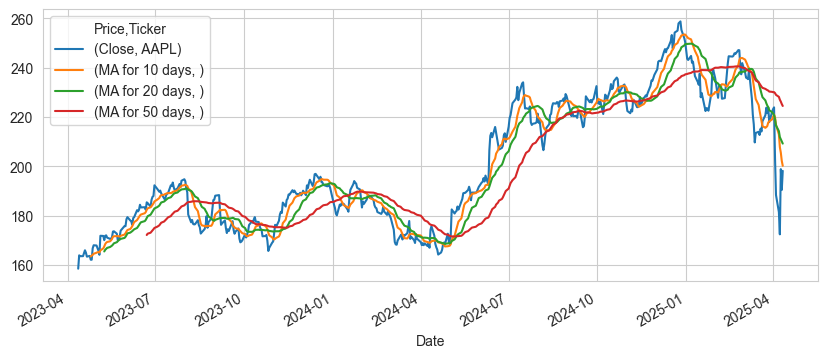

In [30]:
stock_data['AAPL'][['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))
plt.show()

In [38]:
closing_df= yf.download(tech_list,start,end)['Close']

[*********************100%***********************]  4 of 4 completed


In [39]:
closing_df.head

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-04-12,158.501556,97.830002,104.723984,279.051819
2023-04-13,163.907059,102.400002,107.679977,285.302399
2023-04-14,163.560547,102.510002,108.943993,281.660339
2023-04-17,163.580307,102.739998,105.918320,284.278656
2023-04-18,164.807968,102.300003,104.624443,283.855408


In [40]:
closing_df.tail()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2025-04-07,181.460007,175.259995,149.240005,357.859985
2025-04-08,172.419998,170.660004,146.580002,354.559998
2025-04-09,198.850006,191.100006,161.059998,390.489990
2025-04-10,190.419998,181.220001,155.369995,381.350006
2025-04-11,198.149994,184.869995,159.399994,388.450012


In [41]:
tech_rets= closing_df.pct_change()

In [42]:
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-04-12,NaN,NaN,NaN,NaN
2023-04-13,0.034104,0.046714,0.028227,0.022399
2023-04-14,-0.002114,0.001074,0.011739,-0.012766
2023-04-17,0.000121,0.002244,-0.027773,0.009296
2023-04-18,0.007505,-0.004283,-0.012216,-0.001489


In [43]:
tech_rets.tail()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2025-04-07,-0.036734,0.024912,0.010153,-0.005502
2025-04-08,-0.049818,-0.026247,-0.017824,-0.009221
2025-04-09,0.153289,0.119770,0.098786,0.101337
2025-04-10,-0.042394,-0.051701,-0.035328,-0.023406
2025-04-11,0.040594,0.020141,0.025938,0.018618


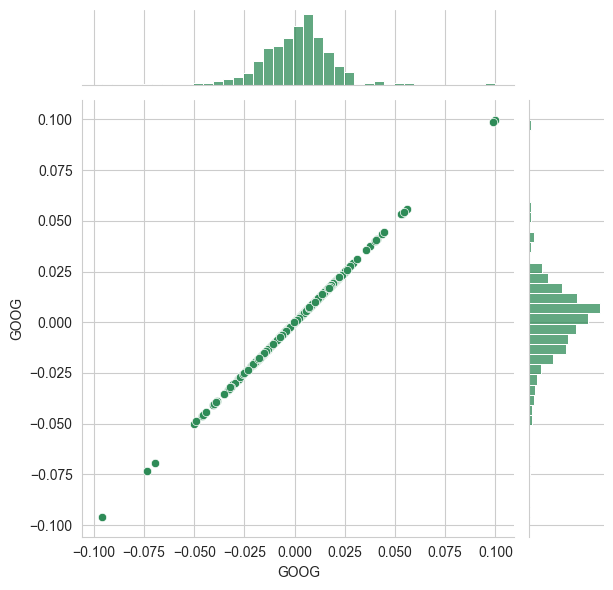

In [48]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')
plt.show()

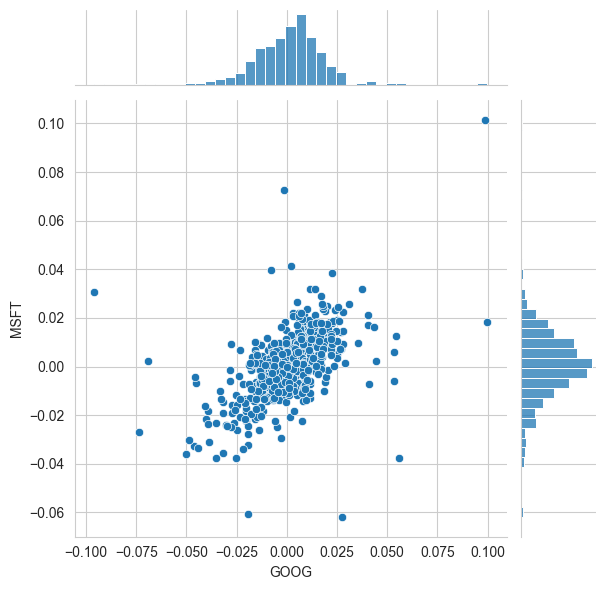

In [49]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter')
plt.show()

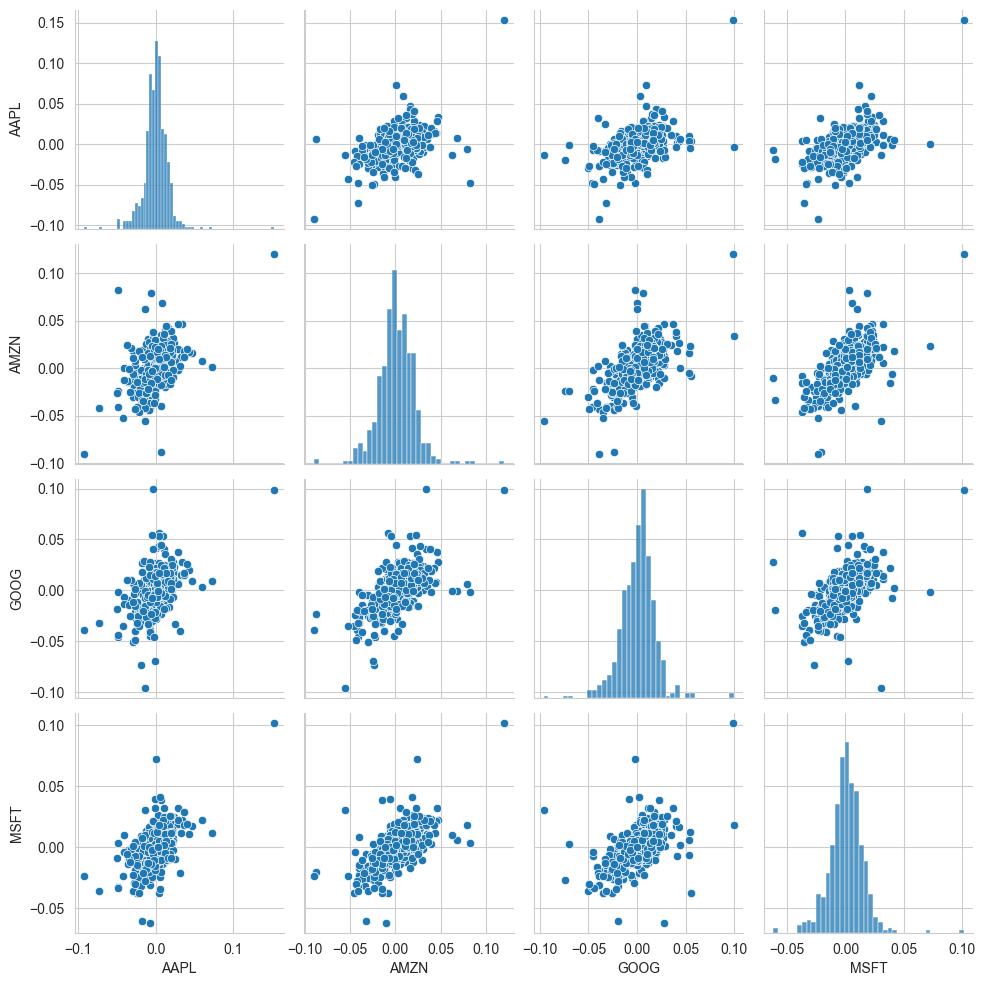

In [50]:
sns.pairplot(tech_rets.dropna())

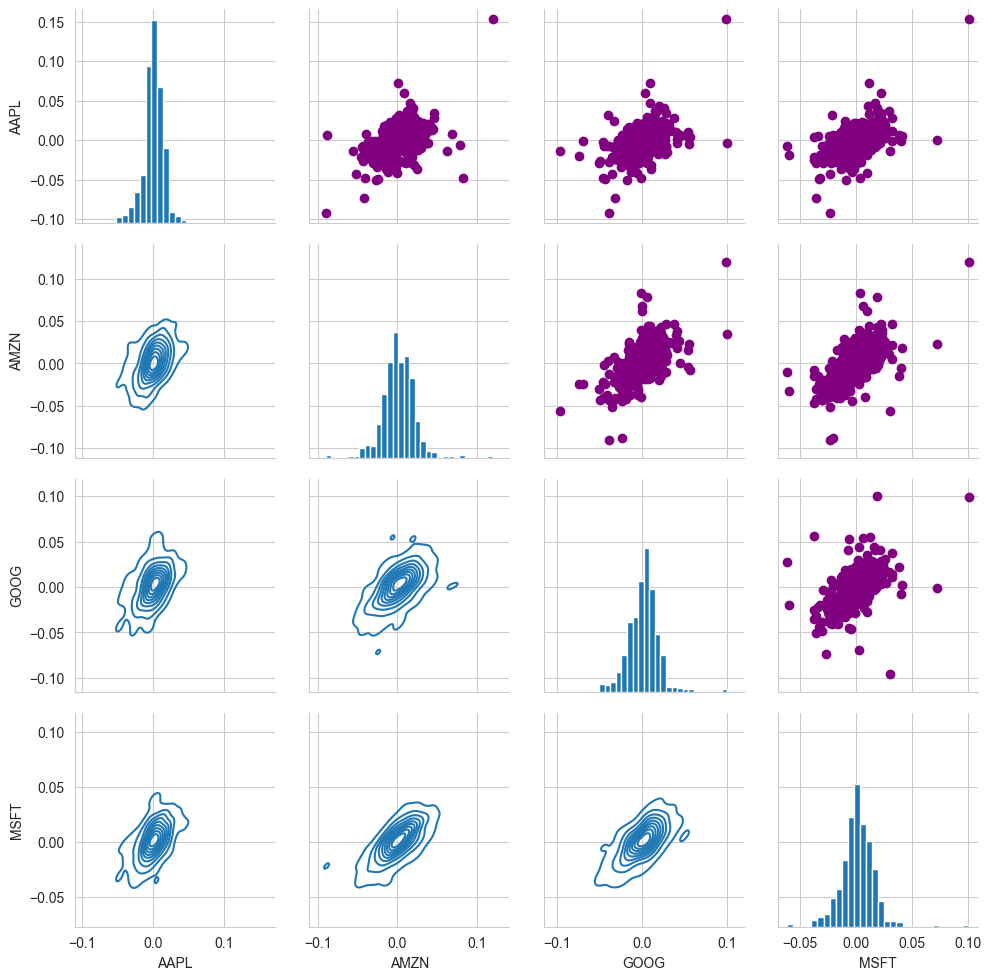

In [52]:
returns_fig= sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,palette='coold_d')
returns_fig.map_diag(plt.hist,bins=30)

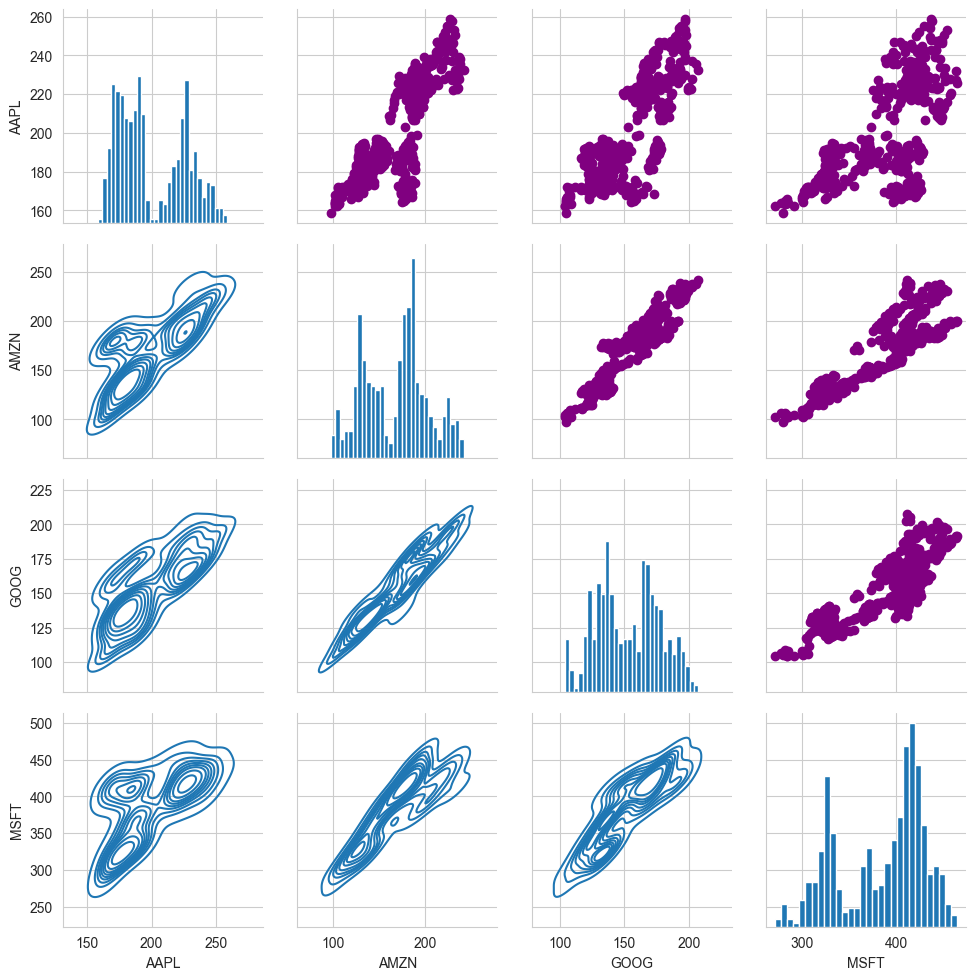

In [53]:
returns_fig= sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,palette='coold_d')
returns_fig.map_diag(plt.hist,bins=30)

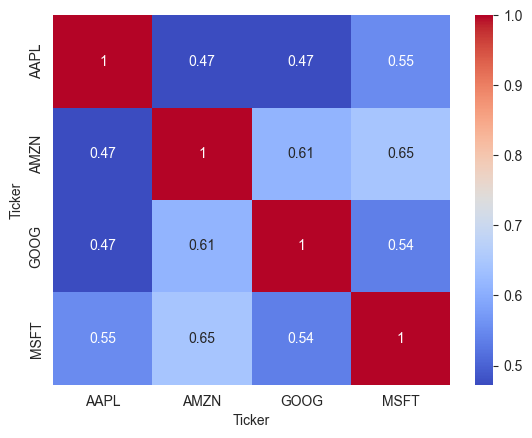

In [57]:
corr = tech_rets.dropna().corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='Ticker', ylabel='Ticker'>

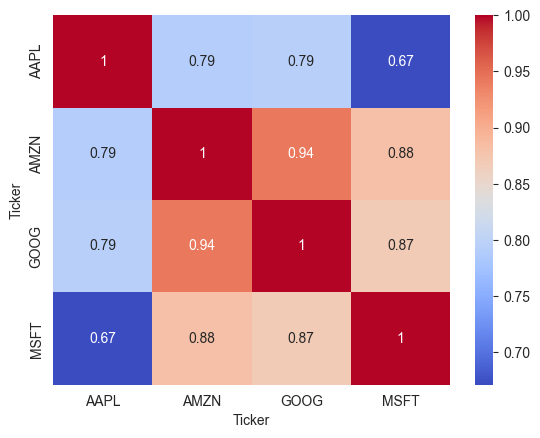

In [58]:
corr = closing_df.dropna().corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [59]:
rets=tech_rets.dropna()

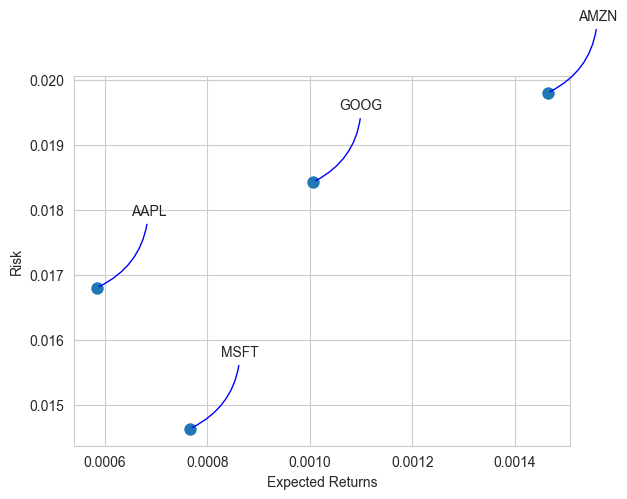

In [64]:
area=np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy=(x,y), xytext=(50,50),
        textcoords= 'offset points', ha='right', va='bottom',
        arrowprops= dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3',color='blue'))

In [66]:
rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-04-13,0.034104,0.046714,0.028227,0.022399
2023-04-14,-0.002114,0.001074,0.011739,-0.012766
2023-04-17,0.000121,0.002244,-0.027773,0.009296
2023-04-18,0.007505,-0.004283,-0.012216,-0.001489
2023-04-19,0.006968,0.019550,-0.000951,0.000277


In [67]:
rets['AAPL'].quantile(0.05)

np.float64(-0.026131077746878194)